In [81]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Importando DataSet

In [82]:
dataset = pd.read_csv('Employee_Compensation_SF.csv', sep=',')
dataset.head()

,Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
0,Fiscal,2016,1,Public Protection,DAT,District Attorney,311.0,Municipal Attorneys' Association,8100,Legal & Court,...,49919,114473.16,0.0,1500.00,115973.16,21025.98,13068.80,9368.71,43463.49,159436.65
1,Calendar,2013,5,Culture & Recreation,ART,Arts Commission,790.0,"SEIU - Miscellaneous, Local 1021",1800,"Budget, Admn & Stats Analysis",...,1225,84077.11,0.0,0.00,84077.11,16587.30,12457.73,6931.91,35976.94,120054.05
2,Calendar,2015,4,Community Health,DPH,Public Health,535.0,"SEIU - Human Services, Local 1021",2900,Human Services,...,34873,9980.17,0.0,798.43,10778.60,0.00,2254.93,835.11,3090.04,13868.64
3,Fiscal,2015,4,Community Health,DPH,Public Health,250.0,"SEIU - Health Workers, Local 1021",2200,Medical & Dental,...,51145,2873.41,0.0,0.00,2873.41,0.00,622.63,222.46,845.09,3718.50
4,Fiscal,2014,5,Culture & Recreation,REC,Recreation and Park Commission,790.0,"SEIU - Miscellaneous, Local 1021",3200,Recreation,...,48705,6701.85,0.0,176.70,6878.55,0.00,2711.66,538.43,3250.09,10128.64


In [83]:
to_be_removed = ['Year Type','Union','Organization Group Code','Department Code','Union Code','Job Family Code','Job Code','Employee Identifier', 'Retirement','Health/Dental', 'Other Benefits', 'Salaries', 'Overtime','Other Salaries', 'Total Salary','Total Benefits']
ds = dataset.drop(to_be_removed,axis=1)
ds.head()

,Year,Organization Group,Department,Job Family,Job,Total Compensation
0,2016,Public Protection,District Attorney,Legal & Court,Attorney (Civil/Criminal),159436.65
1,2013,Culture & Recreation,Arts Commission,"Budget, Admn & Stats Analysis",Senior Management Assistant,120054.05
2,2015,Community Health,Public Health,Human Services,Eligibility Worker,13868.64
3,2015,Community Health,Public Health,Medical & Dental,Dental Aide,3718.50
4,2014,Culture & Recreation,Recreation and Park Commission,Recreation,Recreation Leader,10128.64


# Exploring Data

In [84]:
ds['Department'].value_counts()

Public Health                             63511
Municipal Transportation Agency           42574
Human Services                            24041
Police                                    23078
Recreation and Park Commission            16298
Airport Commission                        13682
Fire Department                           11761
General Services Agency - Public Works    11114
Sheriff                                    7557
General Services Agency - City Admin       7373
PUC Public Utilities Commission            6816
Public Library                             6668
PUC Water Department                       5910
PUC Wastewater Enterprise                  4225
Superior Court                             4001
PUC Hetch Hetchy                           2980
Juvenile Probation                         2396
City Attorney                              2372
Department of Building Inspection          2280
District Attorney                          2169
Department of Emergency Management      

In [85]:
ds['Job Family'].value_counts()

Nursing                           30278
Street Transit                    23964
Police Services                   19223
Journeyman Trade                  17283
Public Service Aide               15549
Human Services                    14926
Clerical, Secretarial & Steno     13403
Fire Services                     11191
Management                         9566
Housekeeping & Laundry             9479
Professional Engineering           8440
Recreation                         8308
Protection & Apprehension          8176
Correction & Detention             7850
Budget, Admn & Stats Analysis      7771
Information Systems                6621
Legal & Court                      6546
Payroll, Billing & Accounting      6169
Med Therapy & Auxiliary            5773
Library                            5366
Lab, Pharmacy & Med Techs          4924
Personnel                          4210
SF Superior Court                  4141
Sub-Professional Engineering       3977
Semi-Skilled & General Labor       3840


/home/sabinogs/.virtualenvs/ml/local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


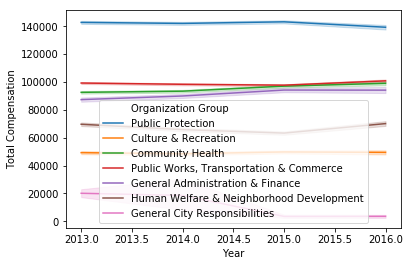

In [87]:
sns.lineplot(x='Year',y='Total Compensation',hue='Organization Group',data=ds)

/home/sabinogs/.virtualenvs/ml/local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


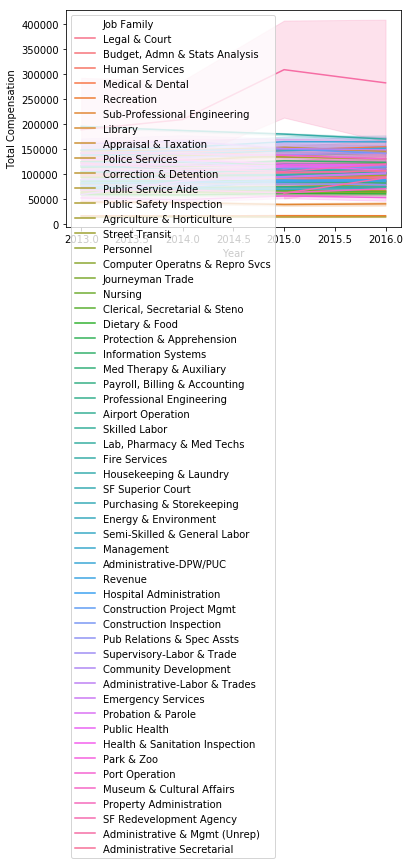

In [88]:
sns.lineplot(x='Year',y='Total Compensation',hue='Job Family',data=ds)

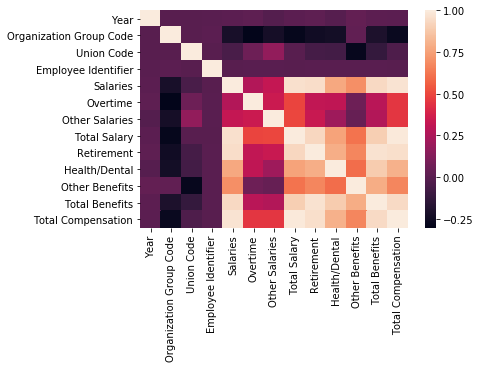

In [89]:
sns.heatmap(dataset.corr())

## Dropando as observações que possuem algum dado faltando

In [90]:
ds[ds.isnull().any(axis=1)].shape

(45, 6)

In [91]:
ds.drop(ds[ds.isnull().any(axis=1)].index, inplace=True)

In [92]:
ds.head()

,Year,Organization Group,Department,Job Family,Job,Total Compensation
0,2016,Public Protection,District Attorney,Legal & Court,Attorney (Civil/Criminal),159436.65
1,2013,Culture & Recreation,Arts Commission,"Budget, Admn & Stats Analysis",Senior Management Assistant,120054.05
2,2015,Community Health,Public Health,Human Services,Eligibility Worker,13868.64
3,2015,Community Health,Public Health,Medical & Dental,Dental Aide,3718.50
4,2014,Culture & Recreation,Recreation and Park Commission,Recreation,Recreation Leader,10128.64


In [93]:
print(
    len(np.unique(ds['Job'])),
    len(np.unique(ds['Job Family']))
)

1136 55


In [98]:
extract_columns = ['Job','Job Family','Department','Organization Group']

_ds = pd.get_dummies(ds, columns=extract_columns, prefix=extract_columns)
_ds.head()

,Year,Total Compensation,Job_Account Clerk,Job_Accountant I,Job_Accountant II,Job_Accountant II (OCII),Job_Accountant III,Job_Accountant III (OCII),Job_Accountant IV,Job_Accountant Intern,...,Department_Superior Court,Department_Treasurer/Tax Collector,Department_War Memorial,Organization Group_Community Health,Organization Group_Culture & Recreation,Organization Group_General Administration & Finance,Organization Group_General City Responsibilities,Organization Group_Human Welfare & Neighborhood Development,Organization Group_Public Protection,"Organization Group_Public Works, Transportation & Commerce"
0,2016,159436.65,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2013,120054.05,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2015,13868.64,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,2015,3718.50,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2014,10128.64,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


_ds.to_csv('final_dataset.csv',sep=';')